# **Introduction**

The California dataset provided in this project aims to provide insights into the California housing market by analyzing various features such as median income, housing median age, median house values, and ocean proximity.

In this project, we will explore the dataset to answer questions related to the distribution of data, relationship between features, handling of missing data, and creation of new features. We will also write a user-defined function to calculate the median value of the dataset.

In [4]:
#Importing required Libraries

import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
import seaborn as sns

In [6]:
 # loading Data
housing = pd.read_excel('C:/Users/Sanjay/Documents/GitHub/California-Housing-Dataset-Analysis/data/housing.xlsx')  

housing.head(6)         #readind data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY


1.   **longitude:** A measure of how far west a house is; a higher value is farther west
2.   **latitude:** A measure of how far north a house is; a higher value is farther north
3.   **housingMedianAge:** Median age of a house within a block; a lower number is a newer building
4.   **totalRooms:** Total number of rooms within a block
5.   **totalBedrooms:** Total number of bedrooms within a block
6.   **population:** Total number of people residing within a block
7.   **households:** Total number of households, a group of people residing within a home unit, for a block
8.   **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.   **medianHouseValue:** Median house value for households within a block (measured in US Dollars)
10.   **oceanProximity:** Location of the house w.r.t ocean/sea


In [7]:
 housing.info()      #Geting data information - columns , total entries , datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In data **total entries are 20640** and **all are numerical data except 'ocean_proximity' column**. In **column 'total_bedrooms'** entries are 20433(**missing values are 207**)

In [8]:
housing[housing.isnull().any(axis=1)]        # Data which have NaN values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [9]:
housing['ocean_proximity'].value_counts()       # getting information for column "ocean_proximity" all attributes

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()     # Getting data basic overview

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


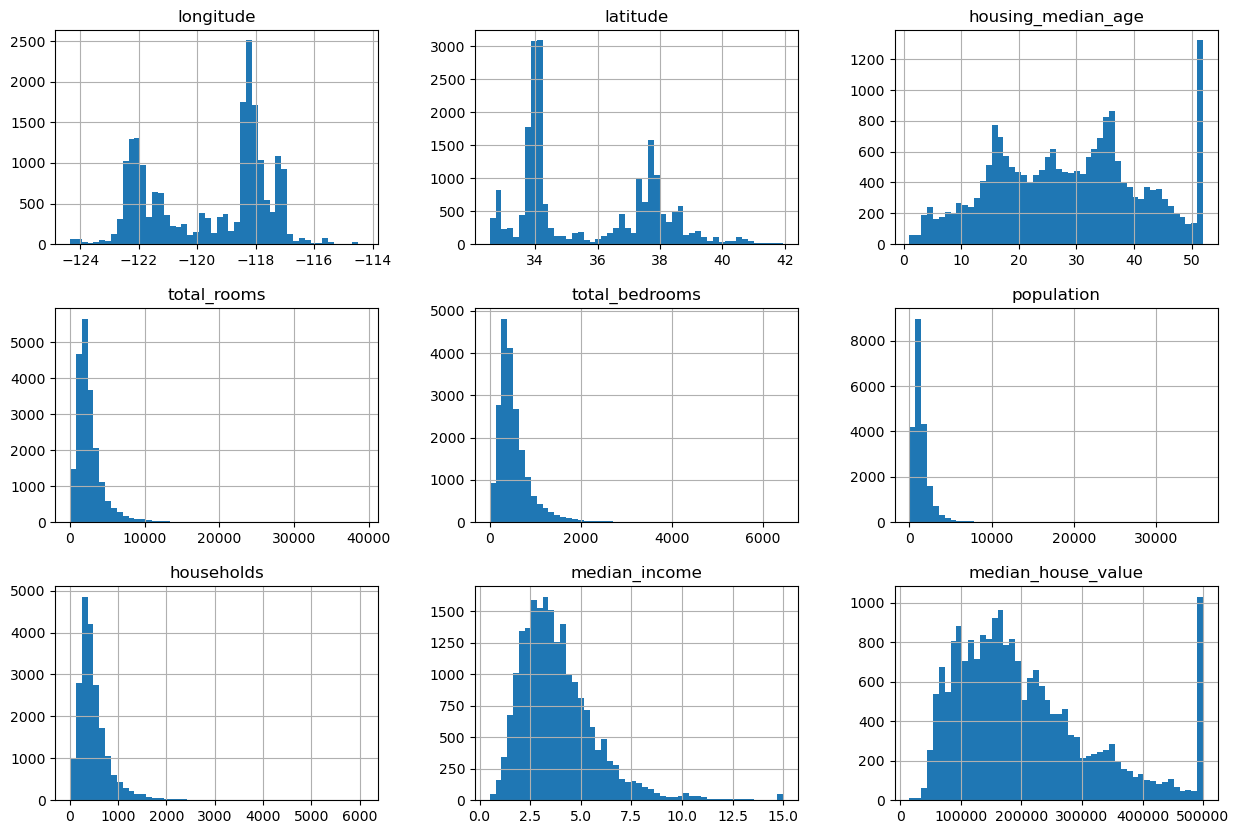

In [11]:
housing.hist(bins = 50 ,figsize=(15,10))      #ploting histogram for data frame to known data distribution
plt.show()

On first impression,We can see **some Outerlier**(inconsistence with data set) group are present in data;( **'housing_median_age' & 'median_house_value'** )

# **Please address the following questions:**

## **1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.**

In [12]:
housing['median_income'].mean()            #Finding mean/avg. of column 'median_income'
#mean = np.mean(housing['median_income'])  #Finding mean by numpy library
#print(mean)

3.8706710029070246

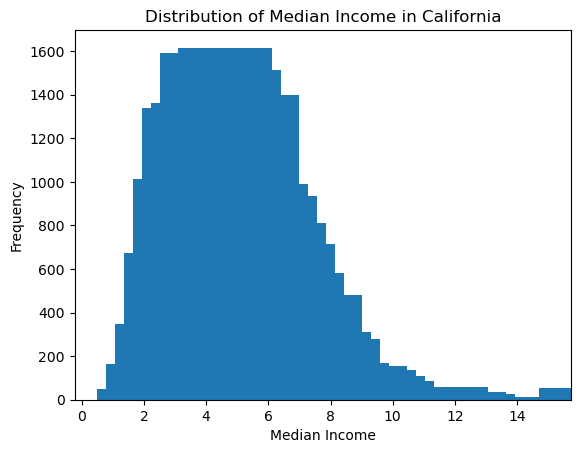

In [14]:
plt.hist(housing['median_income'], width=3, bins=50 )       # ploting Histogram for 'median_housing'
plt.title('Distribution of Median Income in California')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

Column 'median_income' **data is not symmetrical** and **Right skewed**(Mean>Median). Maximum entries lies between 2 - 6(income).

This indicates that the dataset contains more lower-income households than higher-income households

## **2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**

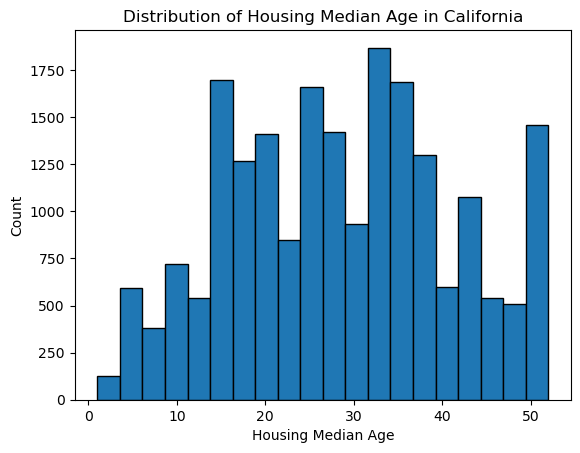

In [15]:
plt.hist(housing['housing_median_age'], bins=20, edgecolor='black')   #Ploting Histogram for 'housing_median_age' with binsize 20
plt.title('Distribution of Housing Median Age in California')         #title of graph
plt.xlabel('Housing Median Age')
plt.ylabel('Count')
plt.show()

Plot shows the distribution of housing median age across the state of California. Observe the frequency of different age groups of houses.

There are more houses in the 15-25 years age range than in the 5-15 years range, and the frequency decreases as the age range gets older.

## **3. Show with the help of visualization, how median_income and median_house_values are related?**

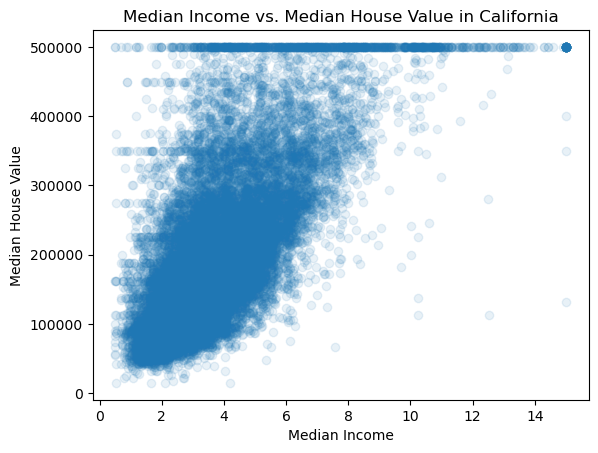

In [16]:
plt.scatter(housing['median_income'], housing['median_house_value'],  #Scatter Plotting for median_income vs median_house_value
            alpha=0.1)                                                #Transparency
plt.title('Median Income vs. Median House Value in California')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Scatter plot shows the relationship between the median_income and median_house_value. We can observe that as the median income increases, the median house value increase as well.

We can observe that there are some outliers where the median house value is much higher than what would be expected based on the median income alone

## **4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**



In [17]:
data_set =  housing.dropna()    # dropping the rows having NaN values
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


## **5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.**

In [18]:
Data_set = housing.fillna(housing.mean())   # Filling the rows having NaN values in column 'total_bedrooms'  by mean value
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


C:\Users\Sanjay\AppData\Local\Temp\ipykernel_16332\4170715058.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Data_set = housing.fillna(housing.mean())   # Filling the rows having NaN values in column 'total_bedrooms'  by mean value


## **6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.**

In [19]:
def median_value(i):
  n = len(i)
  i = sorted(i)
  if n % 2 == 0:
    median1 = i[n//2]
    median2 = i[n//2 - 1]
    median = (median1+median2)/2
    return median
  return i[n//2]
  
median_value(housing['median_income'])

3.5347999999999997

## **7. Plot latitude versus longitude and explain your observations.**

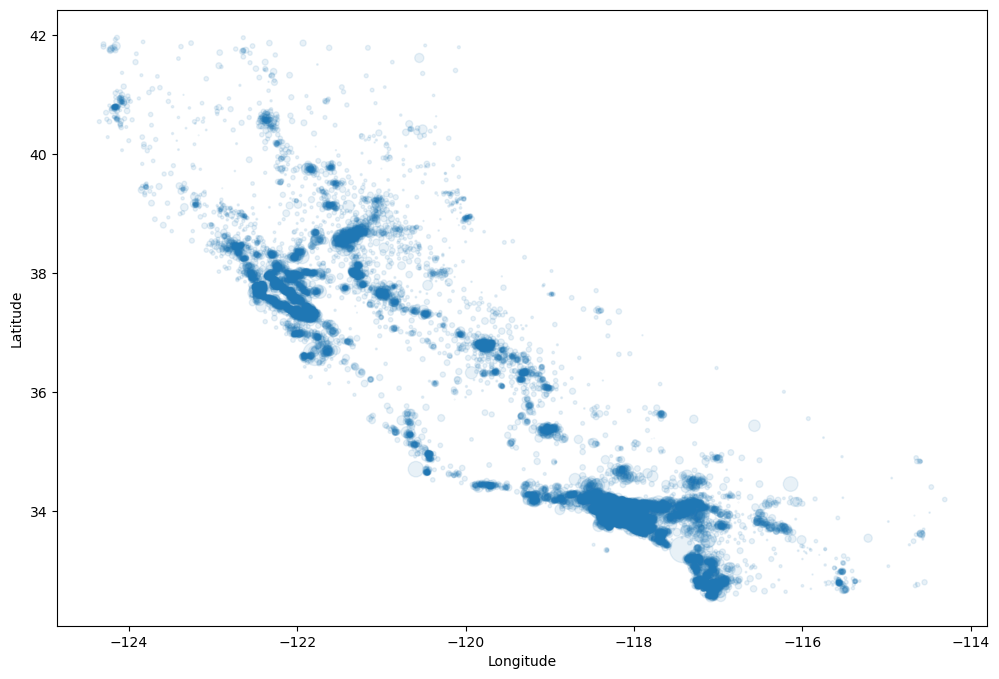

In [20]:
x = housing['longitude']
y = housing['latitude']
plt.figure(figsize = (12,8))
plt.scatter( x,y,
            alpha = 0.1 ,                             #Transparency
            s = housing['population']/100)            #Set the size of data points based on population value
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

We can see that most of the housing data points are clustered in certain areas, such as the coast and in major metropolitan areas.

## **8. Create a data set for which the ocean_proximity is ‘Near ocean’.**

In [21]:
df_op = housing.groupby('ocean_proximity')      # Grouping housing data base on "ocean_proximity"
dataset = df_op.get_group('NEAR OCEAN')         # Selection group 'Near Ocean' data
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


In [22]:
housing[housing['ocean_proximity'] == 'NEAR OCEAN']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


## **9. Find the mean and median of the median income for the data set created in question 8.**

In [23]:
dataset.median_income.mean()  

4.005784800601957

In [24]:
dataset.median_income.median()    

3.64705

## **10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.**

In [25]:
def func(col):                                              # define function to fill the condition
  if col['total_bedrooms'] <= 10:
    return 'small'
  elif col['total_bedrooms'] >=11 and col['total_bedrooms'] < 1000:
      return 'medium'
  else:
      return 'large'

housing['total_bedroom_size'] = housing.apply(func , axis = 1 )
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium


In [26]:
# deleting created column
housing.drop('total_bedroom_size',axis =1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [27]:
# Finding max values row in Population column

housing[housing['population'] == housing['population'].max()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
15360,-117.42,33.35,14,25135,4819.0,35682,4769,2.5729,134400,<1H OCEAN,large
